In [506]:
#some example of output from model and some result
import xarray as xr
import matplotlib
# from tqdm import tqdm
import numpy as np
import cv2
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
# import cartopy.crs as ccrs
import os

In [507]:
import torch
import torch.nn as nn
import torch.nn.functional as func
import numpy as np
import cv2

In [508]:
from mpl_toolkits.basemap import maskoceans

In [509]:
levels = {}
levels["crps"]   = [0,0.2,0.4,0.6,0.8,1.0] 
levels["crpss"]   = [-0.8,-0.4,-0.2,0,0.2,0.4,0.8] 
#levels["crps"]=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
levels["new"]   = [0, 0.1, 1.0 ,5.0, 10.0, 20.0, 30.0, 40.0, 60.0 ,100, 150] 
levels["mae"]   = [0, 0.5, 1 ,1.5, 2, 2.5, 3, 4, 6 ,8, 10] 
levels["hour"]  = [0., 0.2, 1, 5,  10,  20,  30,   40,   60,   80,  100,  150]
levels["day"]   = [0., 0.2, 5, 10,  20,  30,  40,  60,  100,  150,  200,  300]
levels["week"]  = [0., 0.2, 10,  20,  30,  50, 100,  150,  200,  300,  500, 1000]
levels["month"] = [0., 10, 20,  30,  40,  50, 100,  200,  300,  500, 1000, 1500]
levels["year"]  = [0., 50, 100, 200, 300, 400, 600, 1000, 1500, 2000, 3000, 5000]
enum={0:"0600",1:"1200",2:"1800",3:"0000",4:"0600"}

prcp_colours = [
                   "#FFFFFF", 
                   '#edf8b1',
                   '#c7e9b4',
                   '#7fcdbb',
                   '#41b6c4',
                   '#1d91c0',
                   '#225ea8',
                   '#253494',
                   '#4B0082',
                   "#800080",
                   '#8B0000']

prcp_colormap = matplotlib.colors.ListedColormap(prcp_colours)

def draw_aus(var,lat,lon,domain = [111.975, 156.275, -44.525, -9.975], mode="crps-ss" , titles_on = True, title = "CRPS of precipation in 2012", colormap = prcp_colormap, cmap_label = "CRPS-ss",save=False,path=""):
    """ basema_ploting .py
This function takes a 2D data set of a variable from AWAP and maps the data on miller projection. 
The map default span is longitude between 111.975E and 156.275E, and the span for latitudes is -44.525 to -9.975. 
The colour scale is YlGnBu at 11 levels. 
The levels specifed are suitable for annual rainfall totals for Australia. 
"""
    from matplotlib.colors import ListedColormap, BoundaryNorm
    from mpl_toolkits.basemap import Basemap,maskoceans
    
    if mode == "pr":
        level = 'new'
    
    # crps-ss
    if mode == "crps-ss":
        level = "crpss"
             
    if mode == "crps":
        level = "crps"  
    
    fig=plt.figure()
    level=levels[level]
    map = Basemap(projection = "mill", llcrnrlon = domain[0], llcrnrlat = domain[2], urcrnrlon = domain[1], urcrnrlat = domain[3], resolution = 'l')
    map.drawcoastlines()
    #map.drawmapboundary()
    #map.drawparallels(np.arange(-90., 120., 5.),labels=[1,0,0,0])
    #map.drawmeridians(np.arange(-180.,180., 5.),labels=[0,0,0,1])
    llons, llats = np.meshgrid(lon, lat) # 将维度按照 x,y 横向竖向
   # print(lon.shape,llons.shape)
    x,y = map(llons,llats)
   # print(x.shape,y.shape)
    
    norm = BoundaryNorm(level, len(level)-1)
    
    # red square
    #var[255:260,205:510]= 1000
    #var[495:500,210:510]= 1000
    #var[260:500,205:210]= 1000
    #var[260:500,505:510]= 1000
    
    data=xr.DataArray(var,coords=[lat,lon],dims=["lat","lon"])
    
    # pr
    if mode == "pr":
        cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap) 
    
    # crps-ss
    if mode == "crps-ss":
        cs = map.pcolormesh(x, y, data, cmap="RdBu",vmin=-0.8,vmax=0.8) 
        
    if mode == "mae":
        cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap) 
    
    if titles_on:
        # label with title, latitude, longitude, and colormap
        
        plt.title(title)
        #plt.xlabel("\n\nLongitude")
        #plt.ylabel("Latitude\n\n")
        
        # color bar
        cbar = plt.colorbar(ticks = level[:-1], shrink = 0.8, extend = "max")#shrink = 0.8
        cbar.ax.set_ylabel(cmap_label)
        
        #cbar.ax.set_xticklabels(level) #报错
    
    # plt.plot([-1000,1000],[900,1000], c="b", linewidth=2, linestyle=':')
    
    if save:
        plt.savefig(path)
    else:
        plt.show()
    plt.cla()
    plt.close("all")
    return


def draw_aus_pr(var,lat,lon,domain = [111.975, 156.275, -44.525, -9.975], mode="pr" , titles_on = True, title = " precipation in 2012", colormap = prcp_colormap, cmap_label = "PR",save=False,path=""):
    """ basema_ploting .py
This function takes a 2D data set of a variable from AWAP and maps the data on miller projection. 
The map default span is longitude between 111.975E and 156.275E, and the span for latitudes is -44.525 to -9.975. 
The colour scale is YlGnBu at 11 levels. 
The levels specifed are suitable for annual rainfall totals for Australia. 
"""
    from matplotlib.colors import ListedColormap, BoundaryNorm
    from mpl_toolkits.basemap import Basemap,maskoceans
    
    if mode == "pr":
        level = 'new'
    
    # crps-ss
    if mode == "crps-ss":
        level = "crpss"
             
    if mode == "crps":
        level = "crps"  
    
    fig=plt.figure()
    level=levels[level]
    map = Basemap(projection = "mill", llcrnrlon = domain[0], llcrnrlat = domain[2], urcrnrlon = domain[1], urcrnrlat = domain[3], resolution = 'l')
    map.drawcoastlines()
    #map.drawmapboundary()
    #map.drawparallels(np.arange(-90., 120., 5.),labels=[1,0,0,0])
    #map.drawmeridians(np.arange(-180.,180., 5.),labels=[0,0,0,1])
    llons, llats = np.meshgrid(lon, lat) # 将维度按照 x,y 横向竖向
   # print(lon.shape,llons.shape)
    x,y = map(llons,llats)
   # print(x.shape,y.shape)
    
    norm = BoundaryNorm(level, len(level)-1)
    
    # red square
    #var[255:260,205:510]= 1000
    #var[495:500,210:510]= 1000
    #var[260:500,205:210]= 1000
    #var[260:500,505:510]= 1000
    
    data=xr.DataArray(var,coords=[lat,lon],dims=["lat","lon"])
    
    # pr
    if mode == "pr":
        cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap) 
    
    # crps-ss
    if mode == "crps-ss":
        cs = map.pcolormesh(x, y, data, cmap="RdBu",vmin=-0.8,vmax=0.8) 
        
    if mode == "mae":
        cs = map.pcolormesh(x, y, data, norm = norm, cmap = colormap) 
    
    if titles_on:
        # label with title, latitude, longitude, and colormap
        
        plt.title(title)
        #plt.xlabel("\n\nLongitude")
        #plt.ylabel("Latitude\n\n")
        
        # color bar
        cbar = plt.colorbar(ticks = level[:-1], shrink = 0.8, extend = "max")#shrink = 0.8
        cbar.ax.set_ylabel(cmap_label)
        
        #cbar.ax.set_xticklabels(level) #报错
    
    # plt.plot([-1000,1000],[900,1000], c="b", linewidth=2, linestyle=':')
    
    if save:
        plt.savefig(path)
    else:
        plt.show()
    plt.cla()
    plt.close("all")
    return

In [510]:
path=r"E:/VSCodeProject/eval/20120201.nc"
data=xr.open_dataset(path)
data = data.fillna(0)
result = data.isel(time=7)['pr'].values
lat = data.lat.values
lon = data.lon.values

C:\Users\48929\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:150: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


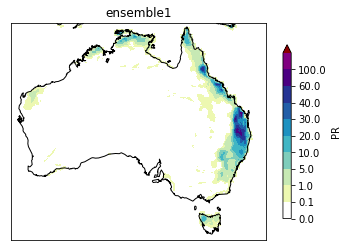

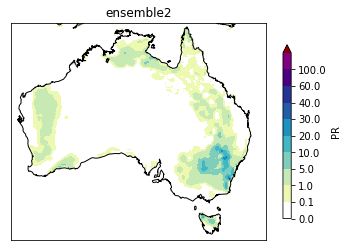

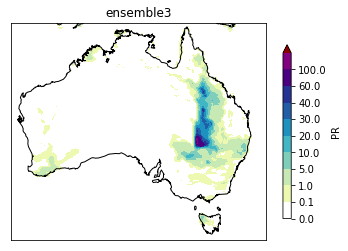

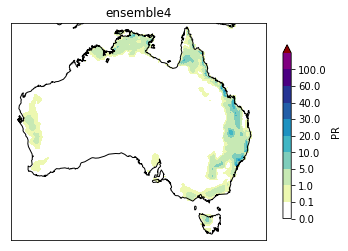

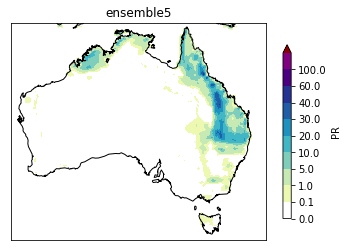

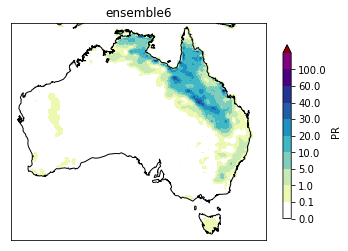

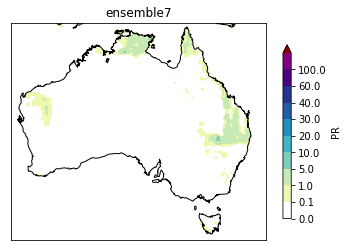

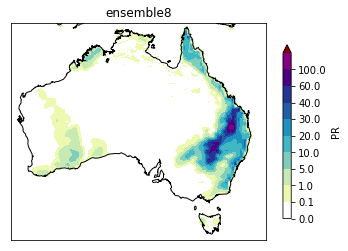

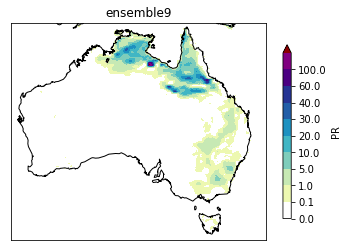

In [512]:
#outpt of 20120206
for i in range(9):
    draw_aus_pr(result[i],lat=lat,lon=lon, title = "ensemble"+str(i+1))

In [513]:
BIpath="E:/VSCodeProject/eval/BI/2012/"

L1path="E:/VSCodeProject/eval/VDSR_L1/2012/"
crpspath="E:/VSCodeProject/eval/VDSR_crps/2012/"
QMpath="E:/VSCodeProject/eval/QM/2012/"

In [514]:
BI=[]
L1=[]
crps=[]
QM=[]
def remove(A):
    A[370:490,200:550]='nan'
    A[290:370,250:400]='nan'
    #A[340:400,490:550]='nan'
    return A
for i in range(30):
    BIdata=remove(np.load(BIpath+"lead_time"+str(i)+"_whole.npy"))+0.1
    
    L1data=remove(np.load(L1path+"lead_time"+str(i)+"_whole.npy"))+0.1
    crpsdata=remove(np.load(crpspath+"lead_time"+str(i)+"_whole.npy"))+0.1
    QMdata=remove(np.load(QMpath+"lead_time"+str(i)+"_whole.npy"))+0.1
    
    BI.append(BIdata)
    L1.append(L1data)
    crps.append(crpsdata)
    QM.append(QMdata)
    
    #BI.append(np.nansum(BIdata)/216850)
    #L1.append(np.nansum(L1data)/216850)
    #crps.append(np.nansum(crpsdata)/216850)
    #QM.append(np.nansum(QMdata)/216850)

In [515]:
x=np.linspace(start = 1, stop = 30, num = 30)

0.9675464
-0.03996842635786136
-0.02852125


C:\Users\48929\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


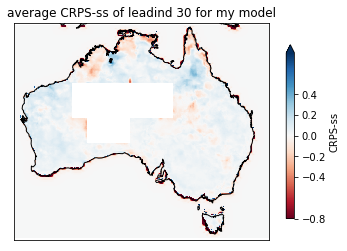

In [520]:
BI_ss=[]
L1_ss=[]
crps_ss=[]
QM_ss=[]


for i in range(30):
    BI_ss.append(np.nanmean(1-(BI[i]/QM[i])))
    #draw_aus(BI_ss[0],lat=lat,lon=lon, title = "BI")
    L1_ss.append(np.nanmean(1-(L1[i]/QM[i])))
    #draw_aus(L1_ss[0],lat=lat,lon=lon, title = "L1")
    crps_ss.append(np.nanmean(1-(crps[i]/QM[i])))
    #draw_aus(crps_ss[0],lat=lat,lon=lon, title = "CRPS")
    QM_ss.append(np.nanmean(1-(QM[i]/QM[i])))

a=1-(crps[29]/QM[29])
print(np.nanmax(a))
print(np.nansum(a)/398347)
print(np.nanmean(a))
draw_aus(a,lat=lat,lon=lon, title = "average CRPS-ss of leadind 30 for my model")
    

In [517]:
BI_image=[]
L1_image=[]
crps_image=[]
for i in range(30):
    BI_image.append(1-(BI[i]/QM[i]))
    L1_image.append(1-(L1[i]/QM[i]))
    crps_image.append(1-(crps[i]/QM[i]))
for i in range(29):
    BI_image[29]=BI_image[29]+BI_image[i]
    L1_image[29]=L1_image[29]+L1_image[i]
    crps_image[29]=crps_image[29]+crps_image[i]


C:\Users\48929\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:77: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


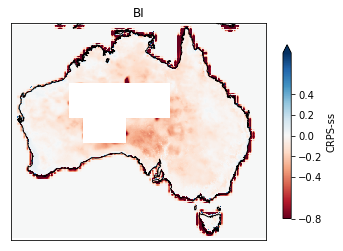

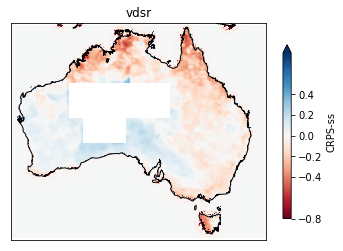

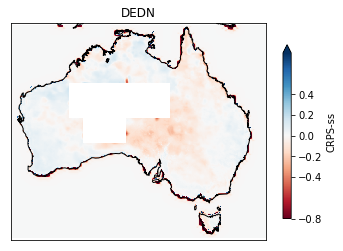

102668
88886
0.97699004


In [518]:
draw_aus(BI_image[29]/30,lat=lat,lon=lon, title = "BI")
draw_aus(L1_image[29]/30,lat=lat,lon=lon, title = "vdsr")
draw_aus(crps_image[29]/30,lat=lat,lon=lon, title = "DEDN")
a=crps_image[29]/30
b=L1_image[29]/30
c=BI_image[29]/30
print(np.nansum(a>0))
print(np.nansum(b>0))
print(np.nanmax(b))

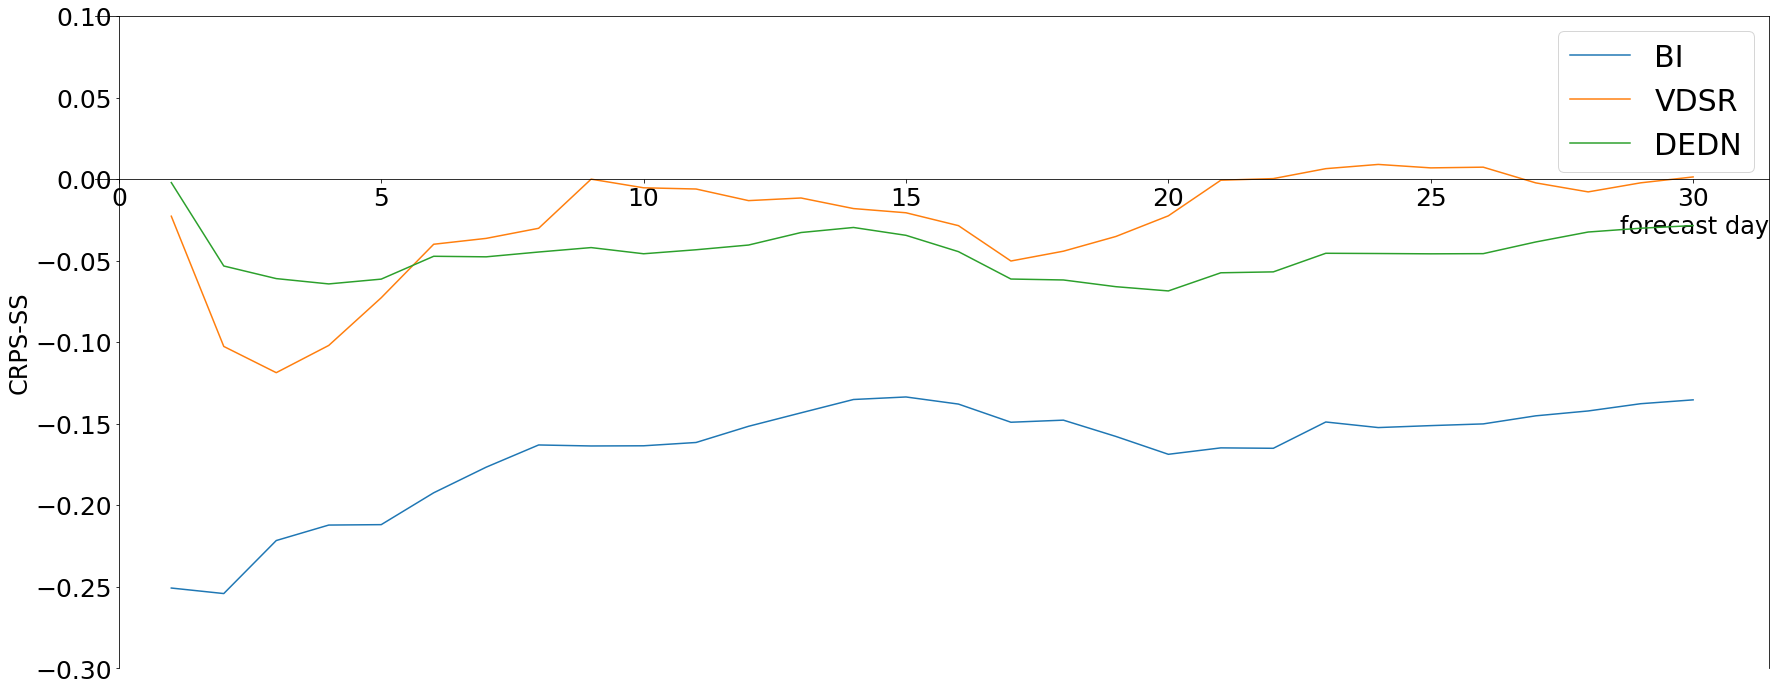

In [519]:
fig = plt.figure(figsize=(30, 12))
plt.tick_params(labelsize=25)
plt.ylim(-0.3,0.1)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
#plt.title('CRPS-SCORE',fontsize=24)
plt.xlabel("forecast day",fontsize=24,loc='right')
plt.ylabel("CRPS-SS",fontsize=24)
plt.plot(x, BI_ss, label='BI')
plt.plot(x, L1_ss,label='VDSR')
plt.plot(x, crps_ss,label='DEDN')
#plt.plot(x, QM_ss,label='QM')
plt.legend(fontsize=30)
plt.show()




